In [1]:
import numpy as np
import matplotlib.pyplot as plt
import edmcmc as edm
import pdb

In [2]:
def mcmcstellarinclination(p, vsini, uvsini, rstar, urstar, prot, uprot, upperlimitvsini):

  cosi = p[0]#; p[0] = cos(i)
  mrstar = p[1]#; p[1] = radius of the star in rsun
  mprot = p[2]#; p[2] = rotation period in days


  if cosi < 0 or cosi > 1: return -np.inf
  if mrstar < 0 or mprot < 0: return -np.inf



  sini = np.sqrt(1-cosi**2)
  

  cv = 2 * np.pi * rstar * 6.9570000e5 / (prot * 24.0 * 3600.0)

  cvsini = cv * sini
  
  if upperlimitvsini:
    if cvsini > vsini: 
        return -np.inf


  if not upperlimitvsini: 
    chisq = (vsini - cvsini)**2/uvsini**2 + (mrstar - rstar)**2/urstar**2 + (mprot - prot)**2/uprot**2
  
  if upperlimitvsini:
    chisq = (mrstar - rstar)**2/urstar**2 + (mprot - prot)**2/uprot**2
  

  return -0.5 * chisq




In [3]:
############ Change these numbers ##########

rstarvalue = .912
rstaruncertainty = .034
vsinivalue = 7.3
vsiniuncertainty = 0.3
protvalue = 6.45
protuncertainty = 0.05

#####################

p = np.array([0.5, rstarvalue, protvalue])
#p[0] = 0.5 # cos(i)
#p[1] = rstarvalue # radius
#p[2] = protvalue #  prot

width = np.array([.3,rstaruncertainty,protuncertainty])

#nwalk = 100
#p = affinemcmcfit('mcmcstellarinclination', p, functargs = extra, width = width, nlink=1000, nwalk=nwalk, perror=perror, $
#  chains = chains, whichwalker = whichwalker, whichlink = whichlink, nburn = 500, allneglogl = allneglogl)


out = edm.edmcmc(mcmcstellarinclination, p, width,
             args=(vsinivalue, vsiniuncertainty, rstarvalue, rstaruncertainty, protvalue, protuncertainty, 0),
                 nwalkers=200, nlink = 1000, nburnin=500)
print('cos(i) = ', np.median(out.flatchains[:,0]), '+/-', np.std(out.flatchains[:,0]))
print('inclination = ', np.median(np.arccos(out.flatchains[:,0])) * 180/np.pi, '+/-', np.std(np.arccos(out.flatchains[:,0]))* 180/np.pi, 'degrees')


0 days, 00:00:00.9 remains. Link 206 of 1000. Acceptance Rate= 0.3

0 days, 00:00:00.0 remains. Link 1000 of 1000. Acceptance Rate= 0.3
cos(i) =  0.12982951650994756 +/- 0.09681011278550207
inclination =  82.54025915765597 +/- 5.653671502161161 degrees


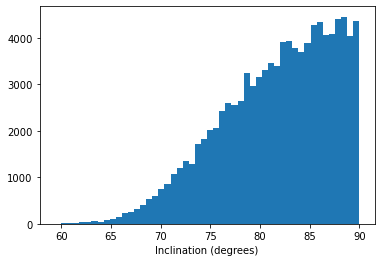

In [14]:
plt.hist(np.arccos(out.flatchains[:,0])*180/np.pi, bins = 50);
plt.xlabel("Inclination (degrees)");